In [1]:
### filtering out warinings

import warnings

warnings.filterwarnings('ignore')

In [2]:
### importing important library

import numpy as np
import seaborn as sns
import pandas as pd
import os
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('application_data.csv')
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

In [5]:
data.shape

(307511, 122)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

### Missing value treatment

In [8]:
#### so , we have 122 columns in the dataset , 
#### we should check wheather the columns are statistically significant or not!!!  

In [9]:
missing_value_columns = data.isnull().sum().sort_values(ascending=False)
missing_value_columns = ((missing_value_columns / data.isnull().count()) * 100).sort_values(ascending=False)

In [10]:
missing_value_columns=pd.DataFrame(missing_value_columns)

In [11]:
missing_value_columns= missing_value_columns.head(60)

In [12]:
missing_value_columns

,0
COMMONAREA_AVG,69.872297
COMMONAREA_MODE,69.872297
COMMONAREA_MEDI,69.872297
NONLIVINGAPARTMENTS_MODE,69.432963
NONLIVINGAPARTMENTS_AVG,69.432963
NONLIVINGAPARTMENTS_MEDI,69.432963
FONDKAPREMONT_MODE,68.386172
LIVINGAPARTMENTS_AVG,68.354953
LIVINGAPARTMENTS_MEDI,68.354953
LIVINGAPARTMENTS_MODE,68.354953


In [13]:
missing_value_columns.index

Index(['COMMONAREA_AVG', 'COMMONAREA_MODE', 'COMMONAREA_MEDI',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MEDI',
       'LIVINGAPARTMENTS_MODE', 'FLOORSMIN_AVG', 'FLOORSMIN_MEDI',
       'FLOORSMIN_MODE', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE',
       'YEARS_BUILD_AVG', 'OWN_CAR_AGE', 'LANDAREA_AVG', 'LANDAREA_MEDI',
       'LANDAREA_MODE', 'BASEMENTAREA_MODE', 'BASEMENTAREA_AVG',
       'BASEMENTAREA_MEDI', 'EXT_SOURCE_1', 'NONLIVINGAREA_AVG',
       'NONLIVINGAREA_MODE', 'NONLIVINGAREA_MEDI', 'ELEVATORS_MODE',
       'ELEVATORS_MEDI', 'ELEVATORS_AVG', 'WALLSMATERIAL_MODE',
       'APARTMENTS_MEDI', 'APARTMENTS_AVG', 'APARTMENTS_MODE', 'ENTRANCES_AVG',
       'ENTRANCES_MEDI', 'ENTRANCES_MODE', 'LIVINGAREA_MODE',
       'LIVINGAREA_MEDI', 'LIVINGAREA_AVG', 'HOUSETYPE_MODE', 'FLOORSMAX_MEDI',
       'FLOORSMAX_MODE', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE

In [14]:
### making a train_DF

In [15]:
train = data

In [16]:
train = train.drop(['COMMONAREA_AVG', 'COMMONAREA_MODE', 'COMMONAREA_MEDI',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MEDI',
       'LIVINGAPARTMENTS_MODE', 'FLOORSMIN_AVG', 'FLOORSMIN_MEDI',
       'FLOORSMIN_MODE', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE',
       'YEARS_BUILD_AVG', 'OWN_CAR_AGE', 'LANDAREA_AVG', 'LANDAREA_MEDI',
       'LANDAREA_MODE', 'BASEMENTAREA_MODE', 'BASEMENTAREA_AVG',
       'BASEMENTAREA_MEDI', 'EXT_SOURCE_1', 'NONLIVINGAREA_AVG',
       'NONLIVINGAREA_MODE', 'NONLIVINGAREA_MEDI', 'ELEVATORS_MODE',
       'ELEVATORS_MEDI', 'ELEVATORS_AVG', 'WALLSMATERIAL_MODE',
       'APARTMENTS_MEDI', 'APARTMENTS_AVG', 'APARTMENTS_MODE', 'ENTRANCES_AVG',
       'ENTRANCES_MEDI', 'ENTRANCES_MODE', 'LIVINGAREA_MODE',
       'LIVINGAREA_MEDI', 'LIVINGAREA_AVG', 'HOUSETYPE_MODE', 'FLOORSMAX_MEDI',
       'FLOORSMAX_MODE', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_AVG',
       'TOTALAREA_MODE', 'EMERGENCYSTATE_MODE'],axis=1)

In [17]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
train.shape

(307511, 73)

In [19]:
### we can see there are certain rows that have missing value as aprrox 13%
impute_data=train[['AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_HOUR']]
impute_data.isnull().sum() * 100 / len(impute_data)

AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
dtype: float64

In [20]:
### we can impute the above columns with mean or median

In [21]:
impute_data.describe()

,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR
count,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,0.265474,1.899974,0.034362,0.267395,0.007000,0.006402
std,0.794056,1.869295,0.204685,0.916002,0.110757,0.083849
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
max,261.000000,25.000000,8.000000,27.000000,9.000000,4.000000


In [22]:
### we will impute the above columns using median

In [23]:
train_df=train.fillna(train[['AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_HOUR']].median())

In [24]:
train_df.isnull().sum()

SK_ID_CURR                     0    
TARGET                         0    
NAME_CONTRACT_TYPE             0    
CODE_GENDER                    0    
FLAG_OWN_CAR                   0    
FLAG_OWN_REALTY                0    
CNT_CHILDREN                   0    
AMT_INCOME_TOTAL               0    
AMT_CREDIT                     0    
AMT_ANNUITY                    12   
AMT_GOODS_PRICE                278  
NAME_TYPE_SUITE                1292 
NAME_INCOME_TYPE               0    
NAME_EDUCATION_TYPE            0    
NAME_FAMILY_STATUS             0    
NAME_HOUSING_TYPE              0    
REGION_POPULATION_RELATIVE     0    
DAYS_BIRTH                     0    
DAYS_EMPLOYED                  0    
DAYS_REGISTRATION              0    
DAYS_ID_PUBLISH                0    
FLAG_MOBIL                     0    
FLAG_EMP_PHONE                 0    
FLAG_WORK_PHONE                0    
FLAG_CONT_MOBILE               0    
FLAG_PHONE                     0    
FLAG_EMAIL                     0    
O

In [25]:
train_df['EXT_SOURCE_3'].fillna(method='ffill',inplace=True)

In [26]:
train_df.isnull().sum()

SK_ID_CURR                     0    
TARGET                         0    
NAME_CONTRACT_TYPE             0    
CODE_GENDER                    0    
FLAG_OWN_CAR                   0    
FLAG_OWN_REALTY                0    
CNT_CHILDREN                   0    
AMT_INCOME_TOTAL               0    
AMT_CREDIT                     0    
AMT_ANNUITY                    12   
AMT_GOODS_PRICE                278  
NAME_TYPE_SUITE                1292 
NAME_INCOME_TYPE               0    
NAME_EDUCATION_TYPE            0    
NAME_FAMILY_STATUS             0    
NAME_HOUSING_TYPE              0    
REGION_POPULATION_RELATIVE     0    
DAYS_BIRTH                     0    
DAYS_EMPLOYED                  0    
DAYS_REGISTRATION              0    
DAYS_ID_PUBLISH                0    
FLAG_MOBIL                     0    
FLAG_EMP_PHONE                 0    
FLAG_WORK_PHONE                0    
FLAG_CONT_MOBILE               0    
FLAG_PHONE                     0    
FLAG_EMAIL                     0    
O

In [27]:
### okay so for occupation column we should replace the nan with unknown

In [28]:
train_df1 = train_df

In [29]:
train_df1.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants              9813 
Medicine staff           8537 
Security staff           6721 
Cooking staff            5946 
Cleaning staff           4653 
Private service staff    2652 
Low-skill Laborers       2093 
Waiters/barmen staff     1348 
Secretaries              1305 
Realty agents            751  
HR staff                 563  
IT staff                 526  
Name: OCCUPATION_TYPE, dtype: int64

In [30]:
### now lets further clean the data

In [31]:
train_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
SK_ID_CURR                     307511 non-null int64
TARGET                         307511 non-null int64
NAME_CONTRACT_TYPE             307511 non-null object
CODE_GENDER                    307511 non-null object
FLAG_OWN_CAR                   307511 non-null object
FLAG_OWN_REALTY                307511 non-null object
CNT_CHILDREN                   307511 non-null int64
AMT_INCOME_TOTAL               307511 non-null float64
AMT_CREDIT                     307511 non-null float64
AMT_ANNUITY                    307499 non-null float64
AMT_GOODS_PRICE                307233 non-null float64
NAME_TYPE_SUITE                306219 non-null object
NAME_INCOME_TYPE               307511 non-null object
NAME_EDUCATION_TYPE            307511 non-null object
NAME_FAMILY_STATUS             307511 non-null object
NAME_HOUSING_TYPE              307511 non-null object
REGION_POPULATION_RELATI

In [32]:
####  lets jump to outliers treatment as datatypes seems to be okay 

### Outliers Treatment

In [33]:
train_df1.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.068510e+05,307511.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,5.143927e-01,0.510859,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.005538,0.006055,0.029723,0.231293,0.229631,1.778463
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,1.910602e-01,0.195062,2.400989,0.446698,2.379803,0.362291,826.808487,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,0.03476,0.099144,0.016327,0.089798,0.024387,0.022518,0.018299,0.078014,0.103037,0.190728,0.856810,0.744059,1.765523
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000

#### lets filter out columns which will be needed for outliers treatment
#### 'AMT_INCOME_TOTAL' ,'AMT_CREDIT' , 'AMT_GOODS_PRICE' 
#### other seems to be okay

In [34]:
#### OUTLIER TREATMENT ON 'AMT_INCOME_TOTAL'

In [35]:
print(round(train_df1['AMT_INCOME_TOTAL'].describe(percentiles=[0.05,0.10,0.25,0.50,0.75,0.85,0.90,0.95,0.99])))

count    307511.0   
mean     168798.0   
std      237123.0   
min      25650.0    
5%       67500.0    
10%      81000.0    
25%      112500.0   
50%      147150.0   
75%      202500.0   
85%      234000.0   
90%      270000.0   
95%      337500.0   
99%      472500.0   
max      117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64


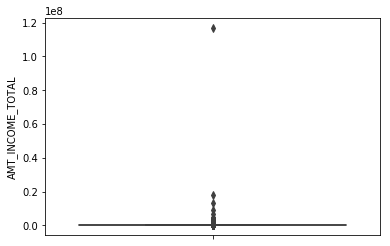

In [36]:
sns.boxplot(y=train_df1['AMT_INCOME_TOTAL'])
plt.show()

In [37]:
### so removing all the outliers from AMT_INCOME_TOTAL by keeping a threshold of 95% i.e after 270000.

In [38]:
train_df1=train_df1[(train_df1.AMT_INCOME_TOTAL<=270000)]

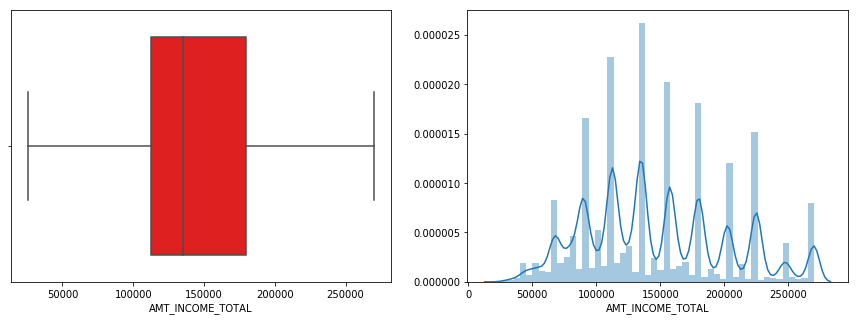

In [39]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(train_df1['AMT_INCOME_TOTAL'],color='Red')
plt.subplot(1,2,2)
sns.distplot(train_df1['AMT_INCOME_TOTAL']) 
plt.show()

In [40]:
#### OUTLIER TREATMENT ON AMT_CREDIT

In [41]:
round(train_df1['AMT_CREDIT'].describe(percentiles=[0.05,0.10,0.25,0.50,0.75,0.85,0.90,0.95,0.99]))

count    280350.0 
mean     565784.0 
std      373915.0 
min      45000.0  
5%       135000.0 
10%      180000.0 
25%      270000.0 
50%      490536.0 
75%      780363.0 
85%      951538.0 
90%      1092519.0
95%      1288350.0
99%      1736937.0
max      3375000.0
Name: AMT_CREDIT, dtype: float64

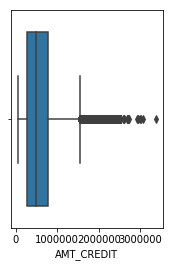

In [42]:
plt.subplot(1,2,1)
sns.boxplot(train_df1['AMT_CREDIT'])
plt.show()

In [43]:
## In the column AMT_CREDIT , we will remove all the outliers by keeping a threshold of 90%
## i.e after 1125000

In [44]:
train_df1 = train_df1[train_df1['AMT_CREDIT']<=1125000]

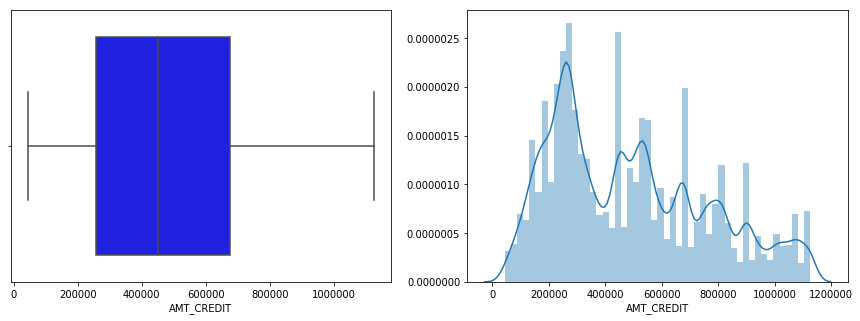

In [45]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(train_df1['AMT_CREDIT'],color='Blue')
plt.subplot(1,2,2)
sns.distplot(train_df1['AMT_CREDIT']) 
plt.show()

In [46]:
#### OUTLIER TREATMENT ON AMT_GOODS_PRICE

In [47]:
round(train_df1['AMT_GOODS_PRICE'].describe(percentiles=[0.05,0.10,0.25,0.50,0.75,0.85,0.90,0.95,0.99]))

count    256740.0 
mean     436770.0 
std      247742.0 
min      40500.0  
5%       126000.0 
10%      157500.0 
25%      225000.0 
50%      450000.0 
75%      675000.0 
85%      679500.0 
90%      810000.0 
95%      900000.0 
99%      1125000.0
max      1350000.0
Name: AMT_GOODS_PRICE, dtype: float64

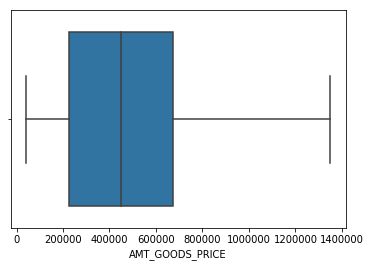

In [48]:
sns.boxplot(train_df1['AMT_GOODS_PRICE'])
plt.show()

In [49]:
## In the column AMT_GOODS_PRICE , we will remove all the outliers by keeping a threshold of 95%
## i.e after 900000

In [50]:
train_df1 = train_df1[train_df1['AMT_GOODS_PRICE']<=900000]

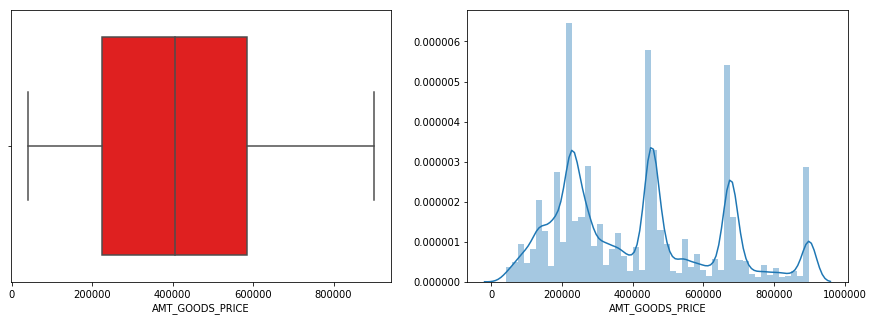

In [51]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(train_df1['AMT_GOODS_PRICE'],color='Red')
plt.subplot(1,2,2)
sns.distplot(train_df1['AMT_GOODS_PRICE']) 
plt.show()

In [52]:
### NOW LETS FURTHER EXPLORE THE COLUMNS

In [53]:
train_df1.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
### Lets remove the -ve sign from the date columns through abs() or by multplying(-1)

In [55]:
train_df1['DAYS_BIRTH']=(train_df1['DAYS_BIRTH']*-1/365)
train_df1['DAYS_BIRTH'].describe()

count    246806.000000
mean     43.779541    
std      12.287833    
min      20.517808    
25%      33.358904    
50%      42.816438    
75%      54.169863    
max      69.043836    
Name: DAYS_BIRTH, dtype: float64

In [56]:
train_df1['DAYS_EMPLOYED']=(train_df1['DAYS_EMPLOYED']*-1/365)
train_df1['DAYS_EMPLOYED'].describe()

count    246806.000000
mean    -188.022293   
std      397.425206   
min     -1000.665753  
25%      0.657534     
50%      3.073973     
75%      7.142466     
max      49.073973    
Name: DAYS_EMPLOYED, dtype: float64

In [57]:
train_df1['DAYS_REGISTRATION']=(train_df1['DAYS_REGISTRATION']*-1/365)
train_df1['DAYS_REGISTRATION'].describe()

count    246806.000000
mean     13.768090    
std      9.680417     
min     -0.000000     
25%      5.673973     
50%      12.410959    
75%      20.597260    
max      67.594521    
Name: DAYS_REGISTRATION, dtype: float64

In [58]:
train_df1['DAYS_LAST_PHONE_CHANGE']=(train_df1['DAYS_LAST_PHONE_CHANGE']*-1/365)
train_df1['DAYS_LAST_PHONE_CHANGE'].describe()

count    246805.000000
mean     2.573636     
std      2.237563     
min     -0.000000     
25%      0.717808     
50%      1.994521     
75%      4.230137     
max      11.758904    
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [59]:
## lets change column name 'DAYS_BIRTH' to 'BIRTH YEAR'
train_df1.rename(columns = {'DAYS_BIRTH':'APPLICANT_AGE'}, inplace = True)

In [60]:
train_df1['APP_AGE_BINS'] = pd.cut(train_df1['APPLICANT_AGE'],bins = np.linspace(20, 70, num = 11))

In [61]:
train_df1.APP_AGE_BINS.value_counts(ascending=False)

(35.0, 40.0]    33314
(30.0, 35.0]    32191
(40.0, 45.0]    31549
(25.0, 30.0]    28403
(50.0, 55.0]    26939
(45.0, 50.0]    26396
(55.0, 60.0]    26213
(60.0, 65.0]    22711
(20.0, 25.0]    11243
(65.0, 70.0]    7847 
Name: APP_AGE_BINS, dtype: int64

In [62]:
### so data looks okay now
### lets jump into analysis and try to find the answers

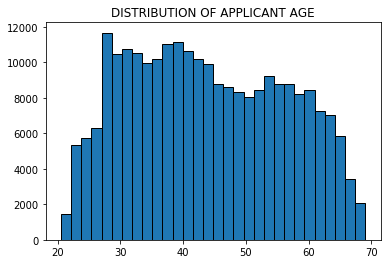

In [63]:
plt.hist(train_df1['APPLICANT_AGE'],bins=30,edgecolor='k')
plt.title('DISTRIBUTION OF APPLICANT AGE')
plt.show()

In [64]:
### lets check the imbalence percentage present in dataset

In [65]:
print(round(train_df1.TARGET.value_counts()[0]/train_df1.TARGET.count()*100))
print(round(train_df1.TARGET.value_counts()[1]/train_df1.TARGET.count()*100))

91.0
9.0


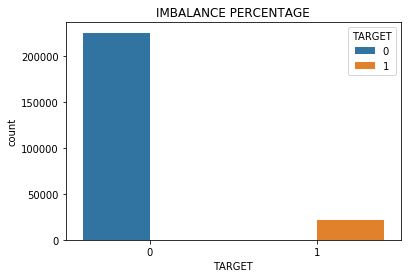

In [66]:
sns.countplot(train_df1['TARGET'],hue=train_df1.TARGET)
plt.title('IMBALANCE PERCENTAGE')
plt.show()

In [67]:
### We can observe that the Data is highly imbalanced , imbalance percentage for target 0 and 1 is 91% and 8%
#### 8% out of total client population have difficulties in repaying loans.

In [68]:
### now lets divide the dataset into 2 categories for finding out further coorelation

In [69]:
train_0=train_df1.loc[train_df1['TARGET']==0]
train_1=train_df1.loc[train_df1['TARGET']==1]

In [70]:
train_0.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,APPLICANT_AGE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,APP_AGE_BINS
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52.180822,0.616438,11.671233,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,2.232877,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,"(50.0, 55.0]"
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52.068493,8.326027,26.939726,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.729567,2.0,0.0,2.0,0.0,1.690411,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,"(50.0, 55.0]"


In [71]:
train_1.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,APPLICANT_AGE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,APP_AGE_BINS
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25.920548,1.745205,9.994521,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,3.106849,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,"(25.0, 30.0]"
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,51.298630,7.200000,18.008219,-1827,1,1,0,1,0,0,Cooking staff,1.0,3,2,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.548477,0.190706,10.0,1.0,10.0,0.0,0.441096,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0,"(50.0, 55.0]"


In [72]:
### now lets see the effect of AGE OF APPLICANT on repaying

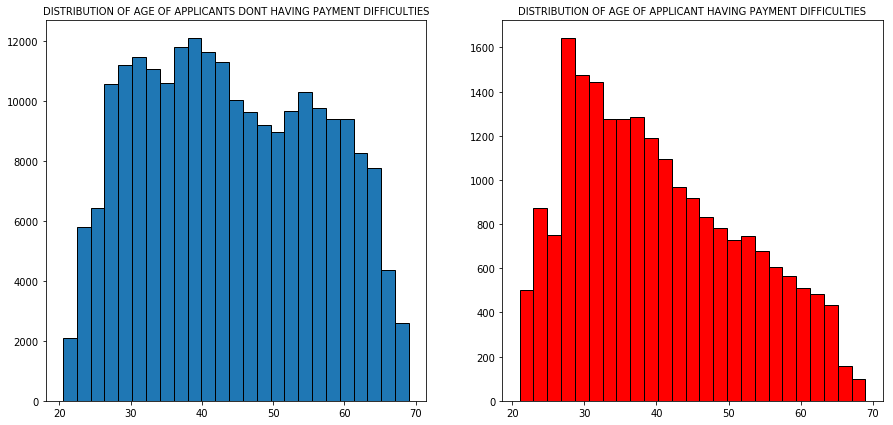

In [73]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.hist(train_0.APPLICANT_AGE,edgecolor='k',bins=25)
plt.title('DISTRIBUTION OF AGE OF APPLICANTS DONT HAVING PAYMENT DIFFICULTIES',fontsize=10)
plt.subplot(1,2,2)
plt.hist(train_1.APPLICANT_AGE,edgecolor='k',bins=25,color='Red')
plt.title('DISTRIBUTION OF AGE OF APPLICANT HAVING PAYMENT DIFFICULTIES',fontsize=10)
plt.show()

### we can see a coorelation of age with payment difficulties, as people tends to pay on time as thier increases as their age increases and the age group 27-37 tends to face more problems in repaying the loans

In [74]:
### NOW LETS CHECK ON DIFFERENT FACTORS

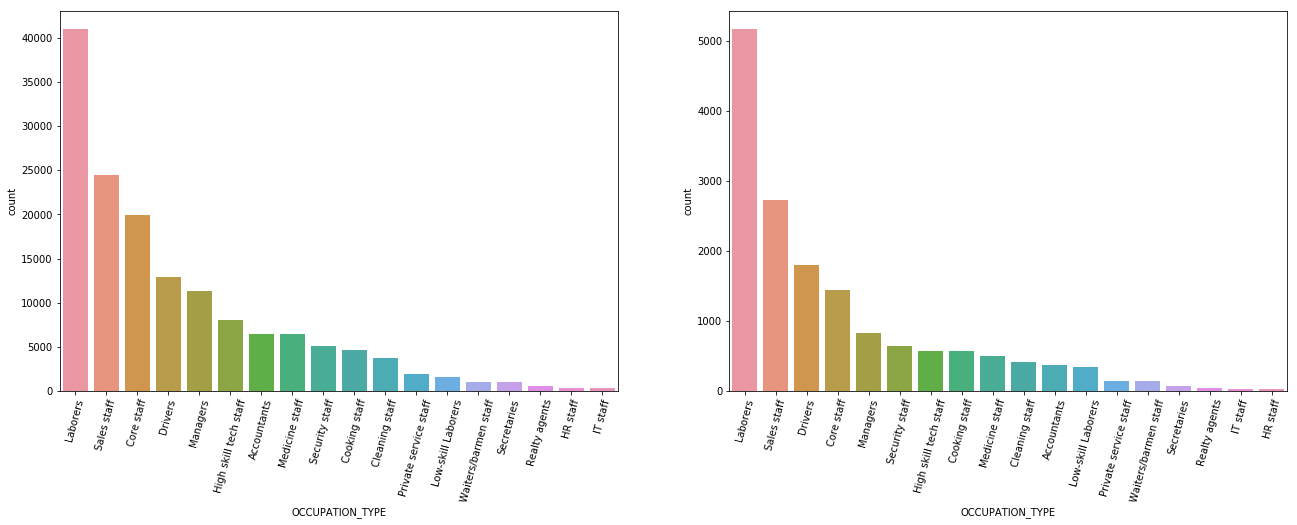

In [75]:
plt.figure(figsize=(22,7))
plt.subplot(1,2,1)
sns.countplot(train_0.OCCUPATION_TYPE,order=train_0.OCCUPATION_TYPE.value_counts().index)
plt.xticks(rotation=75)
plt.subplot(1,2,2)
sns.countplot(train_1.OCCUPATION_TYPE,order=train_1.OCCUPATION_TYPE.value_counts().index)
plt.xticks(rotation=75)
plt.show()

### From the graph above we can say that blue collered folks who tends to take loan most frequently is the one who pays timley as well as the also hfacing difficulties to repay the loan , maybe because the nature of job they are having!! Thats kind of make sense

In [76]:
### NOW LETS SEE THE EFFECT OF ORGANIZATION TYPE ON THE TARGET VARIABLES

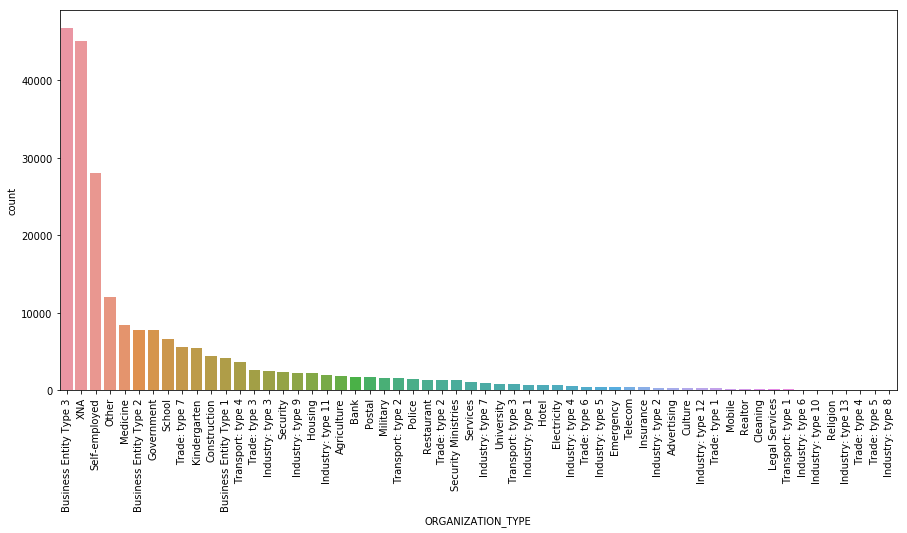

In [77]:
plt.figure(figsize=(15,7))
sns.countplot(train_0.ORGANIZATION_TYPE,order=train_0.ORGANIZATION_TYPE.value_counts().index)
plt.xticks(rotation=90)
plt.show()

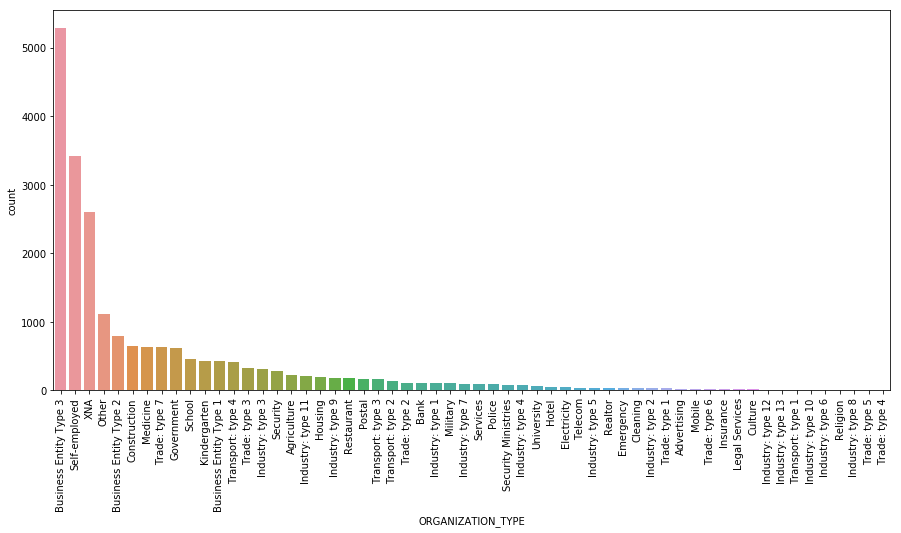

In [78]:
plt.figure(figsize=(15,7))
sns.countplot(train_1.ORGANIZATION_TYPE,order=train_1.ORGANIZATION_TYPE.value_counts().index)
plt.xticks(rotation=90)
plt.show()

### From the above graphs we conclude that buiness employees and self-employed folks tends to face more difficulties in paying loans

In [79]:
### Effect of Contract type , gender and own a car on Target

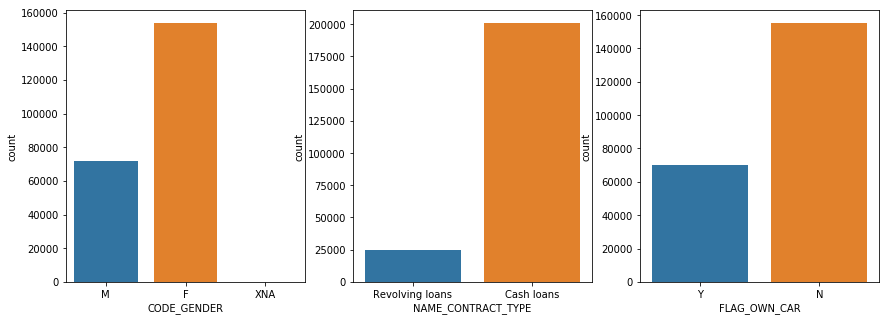

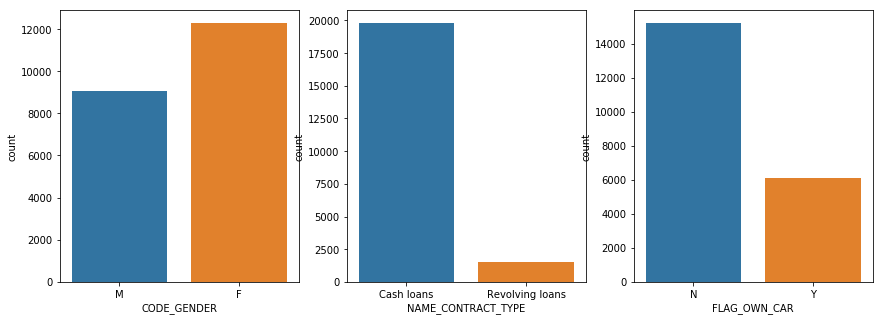

In [80]:
plt.figure(figsize=(30,5))
plt.subplot(1,6,1)
sns.countplot(train_0.CODE_GENDER)
plt.subplot(1,6,2)
sns.countplot(train_0.NAME_CONTRACT_TYPE)
plt.subplot(1,6,3)
sns.countplot(train_0.FLAG_OWN_CAR)
plt.figure(figsize=(30,5))
plt.subplot(1,6,1)
sns.countplot(train_1.CODE_GENDER)
plt.subplot(1,6,2)
sns.countplot(train_1.NAME_CONTRACT_TYPE)
plt.subplot(1,6,3)
sns.countplot(train_1.FLAG_OWN_CAR)
plt.show()

### 1. Though plot looks quite similar in both sets but there are minor things that can be pointed out.
### 2. Majority of female is very high in both cases , where male-female ratio is 1:2 in no defaulter column but we can see a increase in men's column for defaulter.
### 3.In both cases majority doesn't owns a car and plot look quite identical.

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

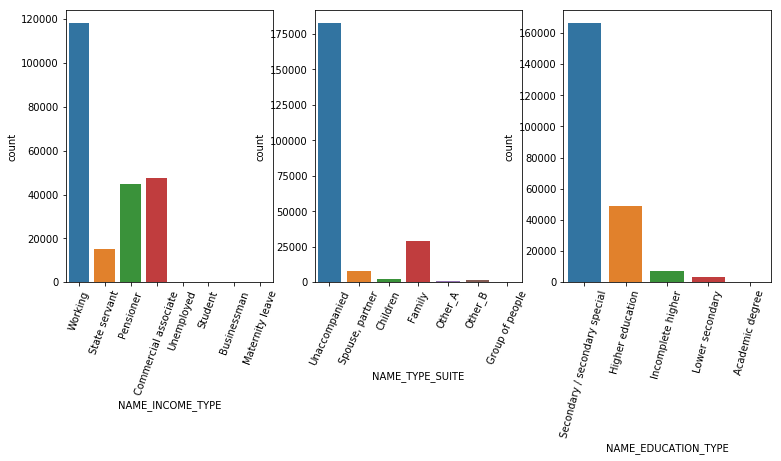

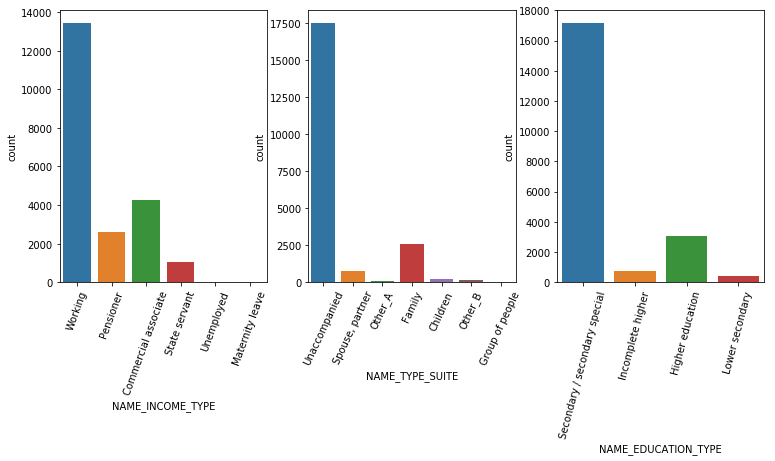

In [81]:
#comparing Df1 and Df0 wrt NAME_INCOME_TYPE,NAME_TYPE_SUITE,NAME_EDUCATION_TYPE

plt.figure(figsize=(26,5))
plt.title('DISTRIBUTION OF FOLKS WHO ARE DEFAULTERS')
plt.subplot(1,6,1)
sns.countplot(train_0['NAME_INCOME_TYPE'])
plt.xticks(rotation=70)
plt.subplot(1,6,2)
sns.countplot(train_0['NAME_TYPE_SUITE'])
plt.xticks(rotation=65)
plt.subplot(1,6,3)
sns.countplot(train_0['NAME_EDUCATION_TYPE'])
plt.xticks(rotation=75)
plt.figure(figsize=(26,5))
plt.title('DISTRIBUTION OF FOLKS WHO ARE DEFAULTERS')
plt.subplot(1,6,1)
sns.countplot(train_1['NAME_INCOME_TYPE'])
plt.xticks(rotation=70)
plt.subplot(1,6,2)
sns.countplot(train_1['NAME_TYPE_SUITE'])
plt.xticks(rotation=65)
plt.subplot(1,6,3)
sns.countplot(train_1['NAME_EDUCATION_TYPE'])
plt.xticks(rotation=75)

###### From above plots we can observe that income type group like student and businessman are less likely to be defaulters meanwhile folks with academic scholar are less likely to have a paymemt difficulties.

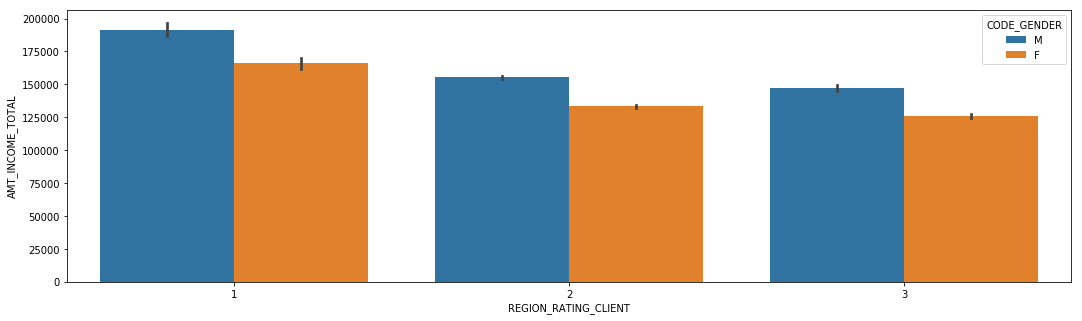

In [82]:
plt.figure(figsize=(18,5))

sns.barplot(x='REGION_RATING_CLIENT',y='AMT_INCOME_TOTAL',hue='CODE_GENDER',data=train_1)
plt.show()

###### FROM THE ABOVE PLOT WE CAN CONCLUDE FOLOWWING THINGS - 
##1) MEN TENDS TO HAVE HIGHER IMCOME THAN A WOMEN
###2) FOLKS HAVING WHO LIVE IN REGION RATING_1 i.e IN HIGHER TIERS REGION TENDS TO EARN WELL
####3) FROM THE PLOT WE CAN OBSEERVE THAT THE PROBALITY OF MEN'S TO BE A DEFAULTER IS MORE THAN A WOMEN'S 

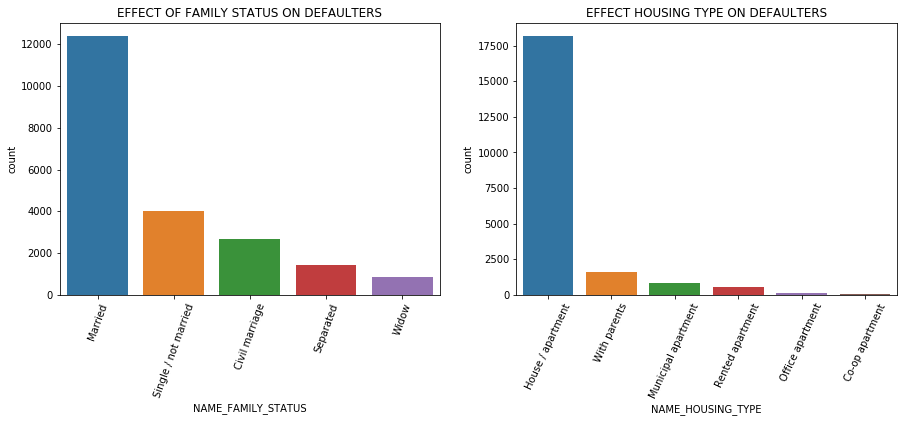

In [83]:
#Effect of Family status , housing type on DEFAULTERS

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x='NAME_FAMILY_STATUS',data=train_1,order=train_1.NAME_FAMILY_STATUS.value_counts().index)
plt.title('EFFECT OF FAMILY STATUS ON DEFAULTERS')
plt.xticks(rotation=70)
plt.subplot(1,2,2)
sns.countplot(x='NAME_HOUSING_TYPE',data=train_1,order=train_1.NAME_HOUSING_TYPE.value_counts().index)
plt.title('EFFECT HOUSING TYPE ON DEFAULTERS')
plt.xticks(rotation=65)
plt.show()

#### FROM THE ABOVE PLOT WE CAN SEE THAT 
####1)MARRIED FOLKS ARE MORE LIKELY TO BE DEFAULTERS AND WIDOW'S ARE LESS LIKELY TO BE A DEFAULTER.
#####2)PEOPLE WHO LIVE IN HOUSE/APARTMENT LIKELY TO DEFAULTERS AND FOLKS WHO LIVE IN OFFICE/APARTMENT OR CO-OP APRTMENT ARE VERY UNLIKELY TO BE A DEFAULETRS

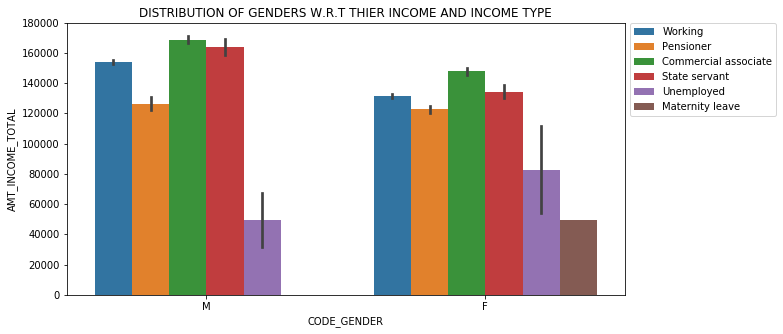

In [84]:
#Effect of Code Gender , income type and total income together on Target 
plt.figure(figsize=(10,5))
sns.barplot(x='CODE_GENDER',y='AMT_INCOME_TOTAL',hue='NAME_INCOME_TYPE',data=train_1)
plt.title('DISTRIBUTION OF GENDERS W.R.T THIER INCOME AND INCOME TYPE')
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.show()

#### From above plots we can conclude that :
##### Top 3 likely to be defaulers on the basis of income type wrt gender and total income is 
######   1. Commercial Associate 
######  2. State Servent 
###### 3. Working client


C:\Users\AASTHA\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
C:\Users\AASTHA\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


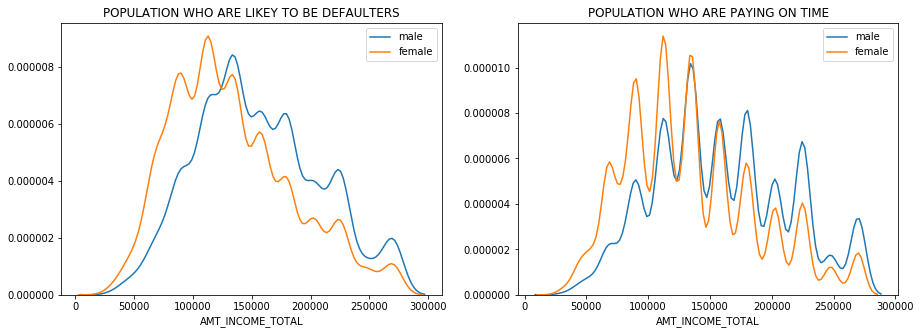

In [85]:
sex=['M','F']
plt.figure(figsize=(15,5))
for i in sex:
    subset=train_1[train_1['CODE_GENDER']==i]
    plt.subplot(1,2,1)
    sns.distplot(subset['AMT_INCOME_TOTAL'],hist=False,label=['Male','female'])
    plt.title('POPULATION WHO ARE LIKEY TO BE DEFAULTERS')
    plt.legend(labels=['male','female'])

for i in sex:
    subset=train_0[train_0['CODE_GENDER']==i]
    plt.subplot(1,2,2)
    sns.distplot(subset['AMT_INCOME_TOTAL'],hist=False,label=['Male','female'])
    plt.title('POPULATION WHO ARE PAYING ON TIME')
    plt.legend(labels=['male','female'])

##### FROM THE ABOVE PLOTS WE CAN CONCLUDE THAT - 
#####  1)Lower the income , greater will be the probability of an individual being a defaulter
#####  2) females are more likely to be defaulter than male

### Now lets look for top correlated variables with respect to the TARGET variables!


In [86]:
dtype=['int64','float64']
new_train=train_0.select_dtypes(include=dtype)
new_train.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,APPLICANT_AGE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,52.180822,0.616438,11.671233,-2531,1,1,1,1,1,0,1.0,2,2,9,0,0,0,0,0,0,0.555912,0.729567,0.0,0.0,0.0,0.0,2.232877,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,52.068493,8.326027,26.939726,-2437,1,1,0,1,0,0,2.0,2,2,17,0,0,0,0,0,0,0.650442,0.729567,2.0,0.0,2.0,0.0,1.690411,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,54.608219,8.323288,11.810959,-3458,1,1,0,1,0,0,1.0,2,2,11,0,0,0,0,1,1,0.322738,0.729567,0.0,0.0,0.0,0.0,3.030137,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,0,99000.0,490495.5,27517.5,454500.0,0.035792,46.413699,4.350685,13.616438,-477,1,1,1,1,1,0,2.0,2,2,16,0,0,0,0,0,0,0.354225,0.621226,0.0,0.0,0.0,0.0,6.947945,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
9,100012,0,0,135000.0,405000.0,20250.0,405000.0,0.019689,39.641096,5.531507,39.553425,-3992,1,1,0,1,0,0,1.0,2,2,8,0,0,0,0,0,0,0.746644,0.751724,2.0,0.0,2.0,0.0,4.583562,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


In [87]:
new_train.drop(['CNT_CHILDREN','REGION_POPULATION_RELATIVE', 
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
        'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'],inplace=True , axis=1)

In [88]:
new_train.columns

Index(['SK_ID_CURR', 'TARGET', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'APPLICANT_AGE', 'DAYS_EMPLOYED', 'FLAG_MOBIL',
       'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [89]:
new_train.drop(['SK_ID_CURR', 'TARGET', 'DAYS_EMPLOYED', 'FLAG_MOBIL',
       'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
        'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],inplace=True , axis = 1)

In [90]:
new_train.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,APPLICANT_AGE,DAYS_LAST_PHONE_CHANGE
2,67500.0,135000.0,6750.0,135000.0,52.180822,2.232877
3,135000.0,312682.5,29686.5,297000.0,52.068493,1.690411
4,121500.0,513000.0,21865.5,513000.0,54.608219,3.030137
5,99000.0,490495.5,27517.5,454500.0,46.413699,6.947945
9,135000.0,405000.0,20250.0,405000.0,39.641096,4.583562


In [91]:
### lets see the correlation between different continous variables
corr = new_train.corr()
corr

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,APPLICANT_AGE,DAYS_LAST_PHONE_CHANGE
AMT_INCOME_TOTAL,1.000000,0.295562,0.384770,0.302398,-0.120130,0.054001
AMT_CREDIT,0.295562,1.000000,0.711065,0.977363,0.030339,0.068039
AMT_ANNUITY,0.384770,0.711065,1.000000,0.720037,-0.048819,0.052860
AMT_GOODS_PRICE,0.302398,0.977363,0.720037,1.000000,0.027491,0.072964
APPLICANT_AGE,-0.120130,0.030339,-0.048819,0.027491,1.000000,0.074674
DAYS_LAST_PHONE_CHANGE,0.054001,0.068039,0.052860,0.072964,0.074674,1.000000


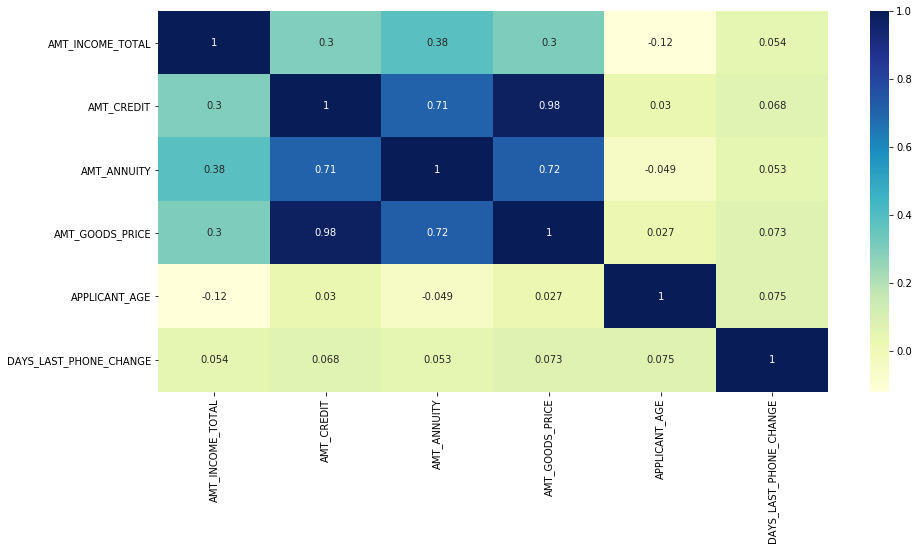

In [92]:
plt.figure(figsize=(15,7))
sns.heatmap(corr,annot=True,cmap='YlGnBu')
plt.show()

In [93]:
##TOP-10 CORRELATION WHICH HAVE AN HIGHER POSSIBILITIES TO NOT BE A DEFAULTER AND MUCH LIKELY TO PAY ON TIME
corr1=corr
corr1=corr1.where(np.triu(np.ones(corr1.shape),k=1).astype(np.bool))
corr1=corr1.abs().unstack().reset_index()
corr1.columns=['Variable_1','Variable_2','CORR']
corr1.dropna(subset=['CORR'],inplace=True)
corr1.sort_values(['CORR'],ascending=False,axis=0,inplace=True)
corr1.head(10)

,Variable_1,Variable_2,CORR
19,AMT_GOODS_PRICE,AMT_CREDIT,0.977363
20,AMT_GOODS_PRICE,AMT_ANNUITY,0.720037
13,AMT_ANNUITY,AMT_CREDIT,0.711065
12,AMT_ANNUITY,AMT_INCOME_TOTAL,0.384770
18,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.302398
6,AMT_CREDIT,AMT_INCOME_TOTAL,0.295562
24,APPLICANT_AGE,AMT_INCOME_TOTAL,0.120130
34,DAYS_LAST_PHONE_CHANGE,APPLICANT_AGE,0.074674
33,DAYS_LAST_PHONE_CHANGE,AMT_GOODS_PRICE,0.072964
31,DAYS_LAST_PHONE_CHANGE,AMT_CREDIT,0.068039


In [94]:
#### Now lets check the correlation between different variables from the defaulters dataset

In [95]:
dtype1 = ['int64' , 'float64']
new_train_1 = train_1.select_dtypes(include=dtype1)

In [96]:
new_train_1.head(5)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,APPLICANT_AGE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,25.920548,1.745205,9.994521,-2120,1,1,0,1,1,0,1.0,2,2,10,0,0,0,0,0,0,0.262949,0.139376,2.0,2.0,2.0,2.0,3.106849,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
26,100031,1,0,112500.0,979992.0,27076.5,702000.0,0.018029,51.298630,7.200000,18.008219,-1827,1,1,0,1,0,0,1.0,3,2,9,0,0,0,0,0,0,0.548477,0.190706,10.0,1.0,10.0,0.0,0.441096,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0
42,100049,1,0,135000.0,288873.0,16258.5,238500.0,0.007305,36.668493,9.854795,0.123288,-4409,1,1,1,1,1,0,2.0,3,3,11,0,0,0,0,0,0,0.674203,0.399676,1.0,0.0,1.0,0.0,4.054795,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
81,100096,1,0,81000.0,252000.0,14593.5,252000.0,0.028663,67.928767,-1000.665753,14.769863,-4199,1,0,0,1,0,0,2.0,2,2,10,0,0,0,0,0,0,0.023952,0.720944,1.0,1.0,1.0,1.0,-0.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
110,100130,1,1,157500.0,723996.0,30802.5,585000.0,0.007274,28.838356,0.731507,1.060274,-3190,1,1,0,1,1,0,2.0,2,2,12,0,1,1,0,1,1,0.282069,0.120641,0.0,0.0,0.0,0.0,0.153425,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [97]:
new_train_1.columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'APPLICANT_AGE', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCU

In [98]:
new_train_1.drop(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN',
       'REGION_POPULATION_RELATIVE', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
        'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],axis=1,inplace=True)

In [99]:
new_train_1.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,APPLICANT_AGE,DAYS_LAST_PHONE_CHANGE
0,202500.0,406597.5,24700.5,351000.0,25.920548,3.106849
26,112500.0,979992.0,27076.5,702000.0,51.298630,0.441096
42,135000.0,288873.0,16258.5,238500.0,36.668493,4.054795
81,81000.0,252000.0,14593.5,252000.0,67.928767,-0.000000
110,157500.0,723996.0,30802.5,585000.0,28.838356,0.153425


In [100]:
corr1 = new_train_1.corr()

In [101]:
corr1

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,APPLICANT_AGE,DAYS_LAST_PHONE_CHANGE
AMT_INCOME_TOTAL,1.000000,0.279945,0.369497,0.286447,-0.032495,0.067817
AMT_CREDIT,0.279945,1.000000,0.716199,0.972356,0.104597,0.089483
AMT_ANNUITY,0.369497,0.716199,1.000000,0.723348,-0.036088,0.053491
AMT_GOODS_PRICE,0.286447,0.972356,0.723348,1.000000,0.103487,0.102389
APPLICANT_AGE,-0.032495,0.104597,-0.036088,0.103487,1.000000,0.104036
DAYS_LAST_PHONE_CHANGE,0.067817,0.089483,0.053491,0.102389,0.104036,1.000000


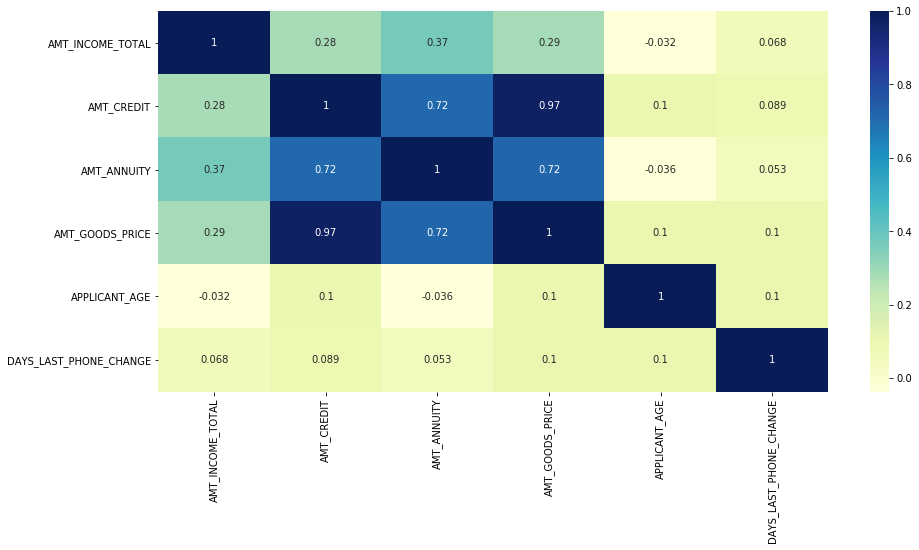

<Figure size 432x288 with 0 Axes>

In [102]:
plt.figure(figsize=(15,7))
sns.heatmap(corr1,annot=True , cmap='YlGnBu')
plt.show()
plt.tight_layout()

In [103]:
#TOP-10 CORRELATION WHICH HAVE AN HIGHER POSSIBILITIES TO BE A DEFAULTER
corr_1=corr1
corr_1=corr_1.where(np.triu(np.ones(corr1.shape),k=1).astype(np.bool))
corr_1=corr_1.abs().unstack().reset_index()
corr_1.columns=['Variable_1','Variable_2','CORR']
corr_1.dropna(subset=['CORR'],inplace=True)
corr_1.sort_values(['CORR'],ascending=False,axis=0,inplace=True)
corr_1.head(10)

,Variable_1,Variable_2,CORR
19,AMT_GOODS_PRICE,AMT_CREDIT,0.972356
20,AMT_GOODS_PRICE,AMT_ANNUITY,0.723348
13,AMT_ANNUITY,AMT_CREDIT,0.716199
12,AMT_ANNUITY,AMT_INCOME_TOTAL,0.369497
18,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.286447
6,AMT_CREDIT,AMT_INCOME_TOTAL,0.279945
25,APPLICANT_AGE,AMT_CREDIT,0.104597
34,DAYS_LAST_PHONE_CHANGE,APPLICANT_AGE,0.104036
27,APPLICANT_AGE,AMT_GOODS_PRICE,0.103487
33,DAYS_LAST_PHONE_CHANGE,AMT_GOODS_PRICE,0.102389


In [104]:
### NOW LETS SEE THE EFFECT OF THE MOST CO-RELATED VARIABLES ON TARGET=1 i.e BEIGN DEFAULTERS!!!!!

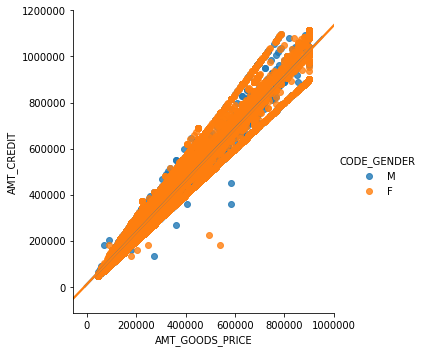

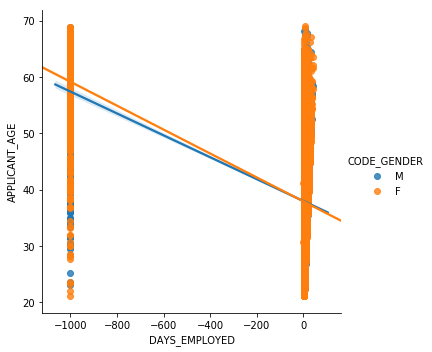

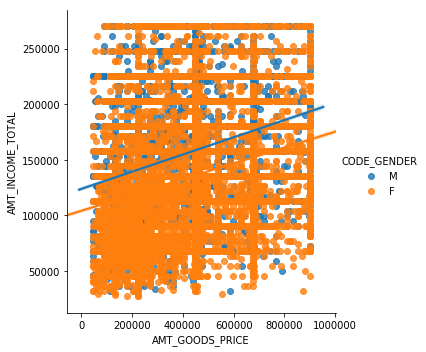

In [105]:
sns.lmplot('AMT_GOODS_PRICE','AMT_CREDIT',data=train_1,hue='CODE_GENDER')
sns.lmplot('DAYS_EMPLOYED','APPLICANT_AGE',data=train_1,hue='CODE_GENDER')
sns.lmplot('AMT_GOODS_PRICE','AMT_INCOME_TOTAL',data=train_1,hue='CODE_GENDER')

1)So , if there is an increase in AMT_GOODS_PRICE which will leads to increase in AMT_CREDIT

2)Greater the applicant age greater will be the no of days of work , which kind of make sense

3)If there a increase in AMT_GOODS that will leads to an increase of TOTAL income of an individual

In [106]:
### NOW LETS SEE THE PREVIOUS YEAR DATASET
prevdf = pd.read_csv('previous_application.csv')
prevdf.head(5)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
round((prevdf.isnull().sum()/len(prevdf))*100,2)

SK_ID_PREV                     0.00 
SK_ID_CURR                     0.00 
NAME_CONTRACT_TYPE             0.00 
AMT_ANNUITY                    22.29
AMT_APPLICATION                0.00 
AMT_CREDIT                     0.00 
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START     0.00 
HOUR_APPR_PROCESS_START        0.00 
FLAG_LAST_APPL_PER_CONTRACT    0.00 
NFLAG_LAST_APPL_IN_DAY         0.00 
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE         0.00 
NAME_CONTRACT_STATUS           0.00 
DAYS_DECISION                  0.00 
NAME_PAYMENT_TYPE              0.00 
CODE_REJECT_REASON             0.00 
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE               0.00 
NAME_GOODS_CATEGORY            0.00 
NAME_PORTFOLIO                 0.00 
NAME_PRODUCT_TYPE              0.00 
CHANNEL_TYPE                   0.00 
SELLERPLACE_AREA               0.00 
N

In [108]:
Columns_drop = ['RATE_INTEREST_PRIMARY','NAME_TYPE_SUITE','RATE_INTEREST_PRIVILEGED','DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','DAYS_TERMINATION','NFLAG_INSURED_ON_APPROVAL']
prevdf = prevdf.drop(Columns_drop, axis = 1)

In [109]:
### LETS FILL THE NAN VALUES WITH MEDIAN FOR FURTHER DATA ANALYSIS

In [110]:
prevdf=prevdf.fillna(prevdf[['AMT_ANNUITY','AMT_DOWN_PAYMENT','CNT_PAYMENT','AMT_GOODS_PRICE','RATE_DOWN_PAYMENT']].median())

In [111]:
prevdf['AMT_GOODS_PRICE']=prevdf['AMT_GOODS_PRICE'].astype(float)
prevdf['CNT_PAYMENT']=prevdf['CNT_PAYMENT'].astype(float)

In [112]:
round(prevdf['AMT_ANNUITY'].describe(percentiles=[0.05,0.10,0.25,0.50,0.75,0.85,0.90,0.95,0.99]))

count    1670214.0
mean     14907.0  
std      13178.0  
min      0.0      
5%       3093.0   
10%      4363.0   
25%      7547.0   
50%      11250.0  
75%      16824.0  
85%      24173.0  
90%      30220.0  
95%      41964.0  
99%      65758.0  
max      418058.0 
Name: AMT_ANNUITY, dtype: float64

In [113]:
prevdf['NAME_YIELD_GROUP'].value_counts()

XNA           517215
middle        385532
high          353331
low_normal    322095
low_action    92041 
Name: NAME_YIELD_GROUP, dtype: int64

In [114]:
prevdf = prevdf[prevdf['NAME_CONTRACT_TYPE']!='XNA']
prevdf = prevdf[prevdf['NAME_CONTRACT_STATUS']!='XNA']
prevdf = prevdf[prevdf['NAME_CLIENT_TYPE']!='XNA']
prevdf = prevdf[prevdf['NAME_YIELD_GROUP']!='XNA']

In [115]:
round(prevdf.AMT_ANNUITY.describe(percentiles=[0.05,0.1,0.25,0.50,0.75,0.85,0.90,0.95,0.99]))

count    1152202.0
mean     16528.0  
std      15138.0  
min      0.0      
5%       3236.0   
10%      4175.0   
25%      6586.0   
50%      11648.0  
75%      21192.0  
85%      28679.0  
90%      35446.0  
95%      47041.0  
99%      71343.0  
max      418058.0 
Name: AMT_ANNUITY, dtype: float64

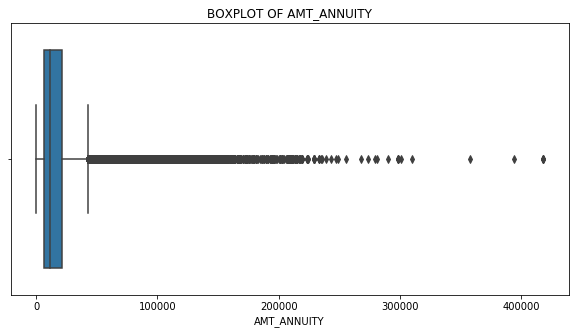

In [116]:
#LETS CHECK FOR OUTLIERS
plt.figure(figsize=(10,5))
plt.title('BOXPLOT OF AMT_ANNUITY')
sns.boxplot(prevdf['AMT_ANNUITY'])
plt.show()

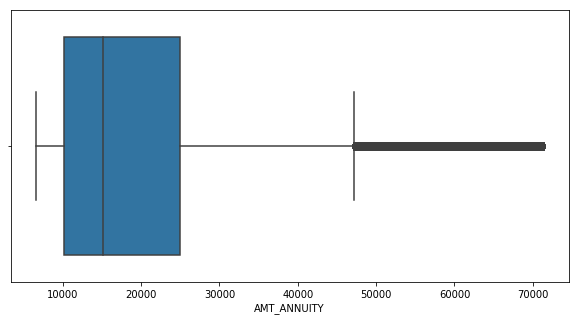

In [117]:
#remove outliers
plt.figure(figsize=(10,5))
low = prevdf['AMT_ANNUITY'].quantile(.25)
high = prevdf['AMT_ANNUITY'].quantile(.99)
prevdf = prevdf[(prevdf['AMT_ANNUITY']>=low) & (prevdf['AMT_ANNUITY']<=high)]
sns.boxplot(prevdf['AMT_ANNUITY'])
plt.show()

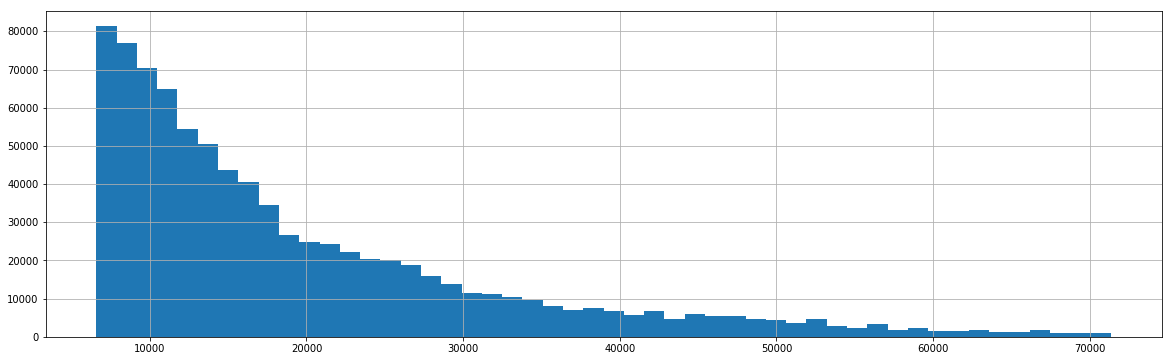

In [118]:
prevdf['AMT_ANNUITY'].hist(figsize = (20,6),bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000283E9156C18>,
      dtype=object)

<Figure size 720x360 with 0 Axes>

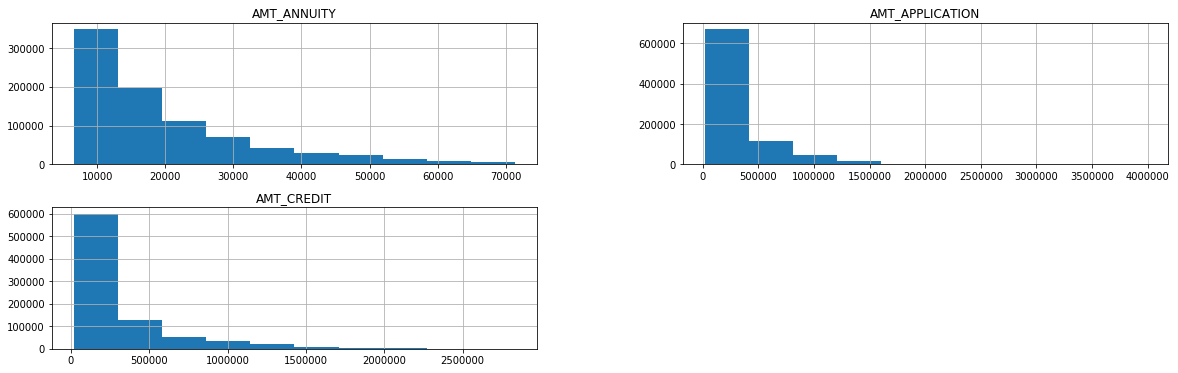

In [119]:
plt.figure(figsize=(10,5))
app_amount = ['AMT_APPLICATION', 'AMT_CREDIT','AMT_ANNUITY']
prevdf[app_amount].hist(figsize = (20,6))

##### relation between annuity amount and application amount is very high which inference that the final credited amount is almost as same to the applied amount.

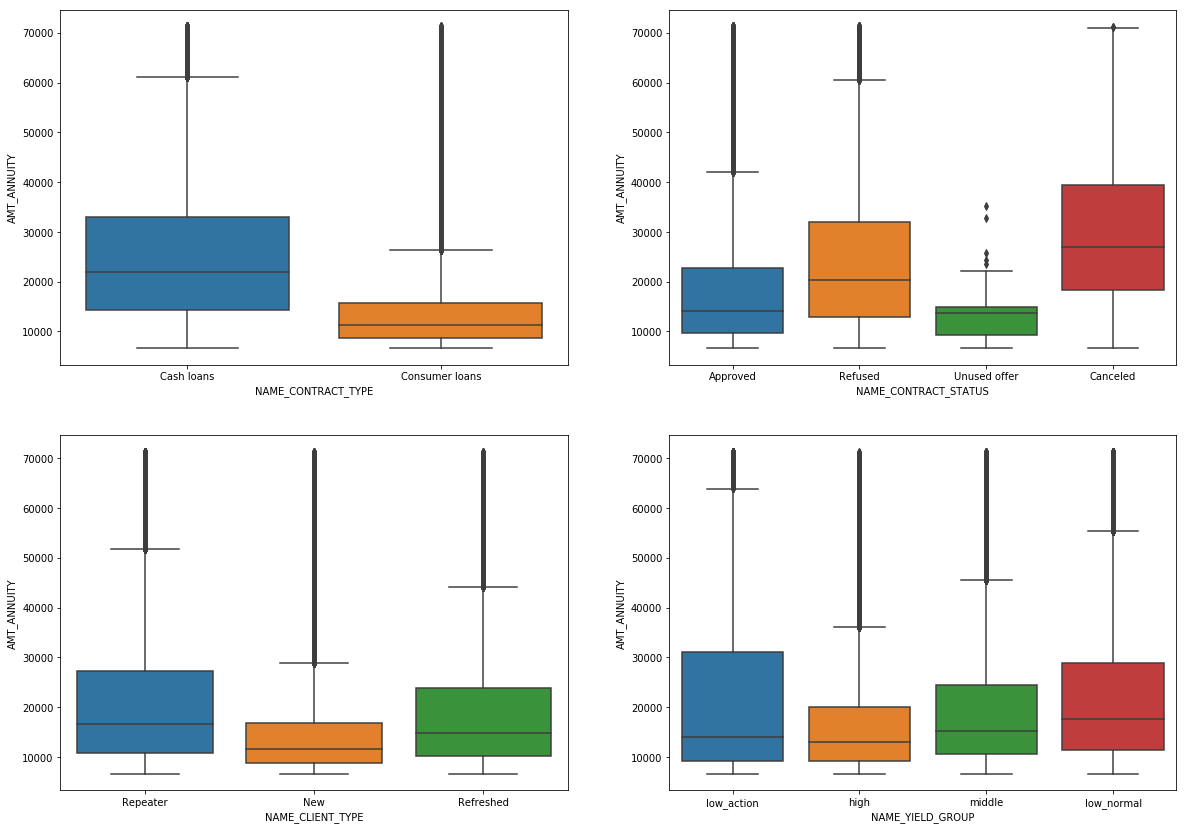

In [120]:
cs = ['NAME_CONTRACT_TYPE','NAME_CONTRACT_STATUS','NAME_CLIENT_TYPE','NAME_YIELD_GROUP']
plt.figure(figsize=(20,30))
for i in enumerate(cs):
    ax = plt.subplot(4,2, i[0]+1)
    sns.boxplot(x = i[1], y = 'AMT_ANNUITY', data = prevdf)

#### From the above graph we can inference following 
##### Cash loans are the main driver and however the consumer loans have higher annuity amount.
##### Clients tends to repeat thier application but for lower annuity amount as the fresh clients tends to have higher annuity amount

(array([-500000.,       0.,  500000., 1000000., 1500000., 2000000.,
        2500000., 3000000., 3500000.]), <a list of 9 Text xticklabel objects>)

<Figure size 864x432 with 0 Axes>

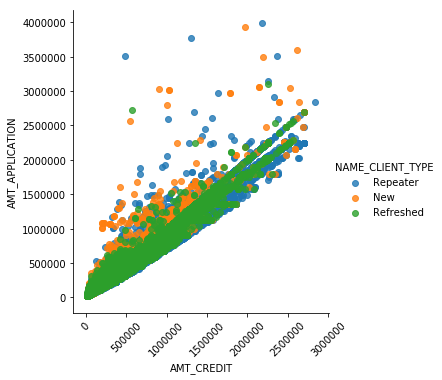

In [121]:
plt.figure(figsize=(12,6))
sns.lmplot('AMT_CREDIT','AMT_APPLICATION', data = prevdf, hue = 'NAME_CLIENT_TYPE' , fit_reg = False)
plt.xticks(rotation=45)

##### From the above lmplot we can say that there is a positive correlation between application amount and credit amount 

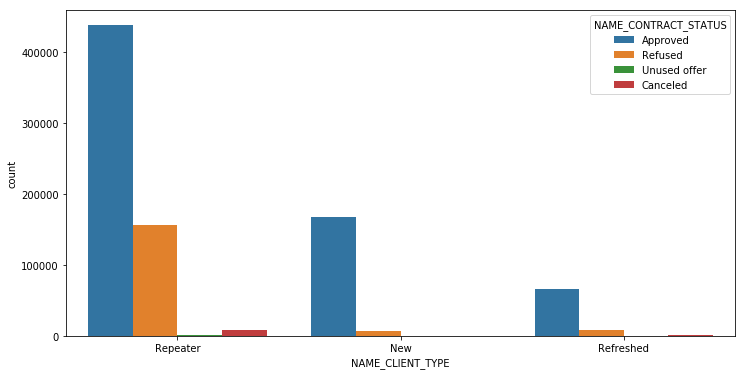

In [122]:
plt.figure(figsize=(12,6))
sns.countplot(x = 'NAME_CLIENT_TYPE', hue = 'NAME_CONTRACT_STATUS', data = prevdf)
plt.show()

##### We can see that the both Approval and refused rate is higher for repeater clients.

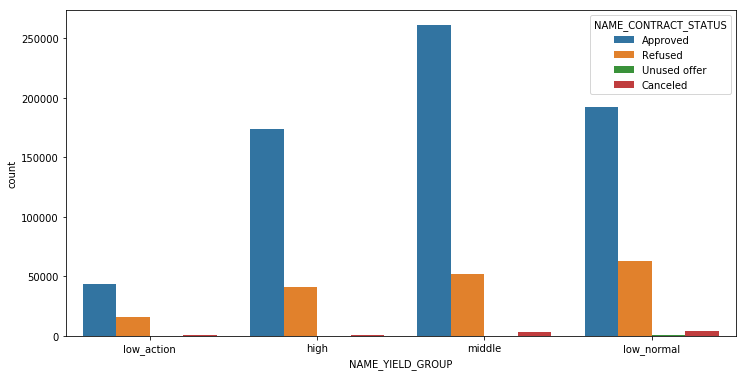

In [123]:
plt.figure(figsize=(12,6))
sns.countplot(x = 'NAME_YIELD_GROUP', hue = 'NAME_CONTRACT_STATUS', data = prevdf)
plt.show()

#####  from the above plot we can say that the contract approved the most for middle group meanwhile contract refused and canceled most for low normal group.

In [124]:
prevdf.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,1638.0,607500.0,THURSDAY,11,Y,1,0.051605,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,1638.0,112500.0,TUESDAY,11,Y,1,0.051605,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,1638.0,450000.0,MONDAY,7,Y,1,0.051605,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,1638.0,337500.0,THURSDAY,9,Y,1,0.051605,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,1638.0,315000.0,SATURDAY,8,Y,1,0.051605,Everyday expenses,Approved,-684,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,18.0,low_normal,Cash X-Sell: low


In [125]:
prevdf.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS',
       'DAYS_DECISION', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION'],
      dtype='object')

In [126]:
corr_df_ = prevdf

In [127]:
corr_df_.AMT_GOODS_PRICE=corr_df_.AMT_GOODS_PRICE.astype(float)
corr_df_.CNT_PAYMENT=corr_df_.CNT_PAYMENT.astype(float)

In [128]:
corr_df_.dtypes

SK_ID_PREV                     int64  
SK_ID_CURR                     int64  
NAME_CONTRACT_TYPE             object 
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START     object 
HOUR_APPR_PROCESS_START        int64  
FLAG_LAST_APPL_PER_CONTRACT    object 
NFLAG_LAST_APPL_IN_DAY         int64  
RATE_DOWN_PAYMENT              float64
NAME_CASH_LOAN_PURPOSE         object 
NAME_CONTRACT_STATUS           object 
DAYS_DECISION                  int64  
NAME_PAYMENT_TYPE              object 
CODE_REJECT_REASON             object 
NAME_CLIENT_TYPE               object 
NAME_GOODS_CATEGORY            object 
NAME_PORTFOLIO                 object 
NAME_PRODUCT_TYPE              object 
CHANNEL_TYPE                   object 
SELLERPLACE_AREA               int64  
NAME_SELLER_INDUSTRY           object 
CNT_PAYMENT              

In [132]:
corr_df_.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS',
       'DAYS_DECISION', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION'],
      dtype='object')

In [134]:
corr_df_.drop(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE','AMT_DOWN_PAYMENT',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS',
       'DAYS_DECISION', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION'],axis=1,inplace=True)

In [136]:
corr_df_.head()

,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,CNT_PAYMENT
1,25188.615,607500.0,679671.0,607500.0,36.0
2,15060.735,112500.0,136444.5,112500.0,12.0
3,47041.335,450000.0,470790.0,450000.0,12.0
4,31924.395,337500.0,404055.0,337500.0,24.0
5,23703.930,315000.0,340573.5,315000.0,18.0


In [137]:
corr_df_.corr()

,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,CNT_PAYMENT
AMT_ANNUITY,1.000000,0.808503,0.803319,0.808503,0.406836
AMT_APPLICATION,0.808503,1.000000,0.993260,1.000000,0.744417
AMT_CREDIT,0.803319,0.993260,1.000000,0.993260,0.770284
AMT_GOODS_PRICE,0.808503,1.000000,0.993260,1.000000,0.744417
CNT_PAYMENT,0.406836,0.744417,0.770284,0.744417,1.000000


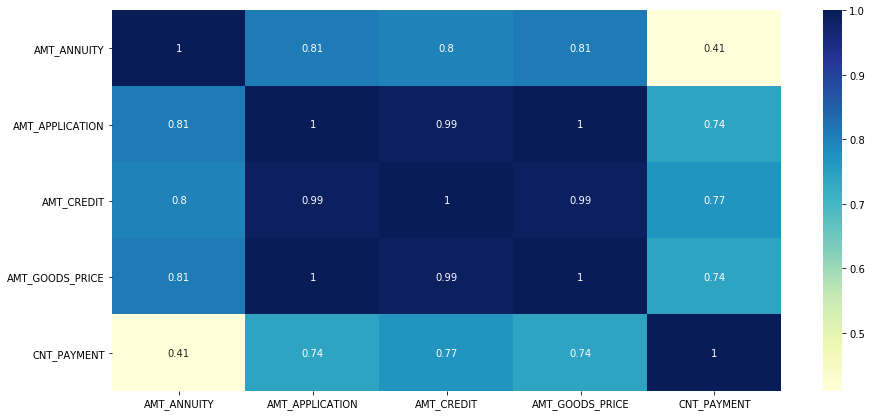

<Figure size 432x288 with 0 Axes>

In [138]:
# Correlation between defferent continous variable in previous application dataset:
corr_1 = round(abs(corr_df_.corr()),2)
plt.figure(figsize=(15,7))
sns.heatmap(corr_1, annot =True,cmap='YlGnBu')
plt.show()
plt.tight_layout()

In [139]:
# Get a list of highly correlated variable
corr_matp = corr_df_.corr()
corrp = corr_matp.where(np.triu(np.ones(corr_matp.shape), k=1).astype(np.bool))
corrp = corrp.abs().unstack().reset_index()
corrp.columns = ['VAR1', 'VAR2', 'CORR']
corrp.dropna(subset = ['CORR'], inplace = True)
corrp.sort_values('CORR', ascending = False)

,VAR1,VAR2,CORR
16,AMT_GOODS_PRICE,AMT_APPLICATION,1.000000
11,AMT_CREDIT,AMT_APPLICATION,0.993260
17,AMT_GOODS_PRICE,AMT_CREDIT,0.993260
5,AMT_APPLICATION,AMT_ANNUITY,0.808503
15,AMT_GOODS_PRICE,AMT_ANNUITY,0.808503
10,AMT_CREDIT,AMT_ANNUITY,0.803319
22,CNT_PAYMENT,AMT_CREDIT,0.770284
21,CNT_PAYMENT,AMT_APPLICATION,0.744417
23,CNT_PAYMENT,AMT_GOODS_PRICE,0.744417
20,CNT_PAYMENT,AMT_ANNUITY,0.406836


#### From the corr matrix we can inference that the correlation between credit amount and application amount is very high which translate that the final disbursed amount is very near to the applied amount.